In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

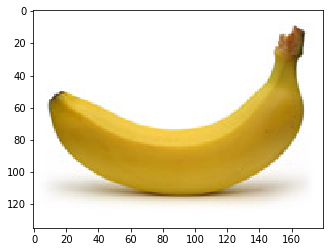

In [16]:
img = cv2.imread('Datos/Frutas/Platano18.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure()
plt.imshow(img_rgb)
plt.show()

No handles with labels found to put in legend.


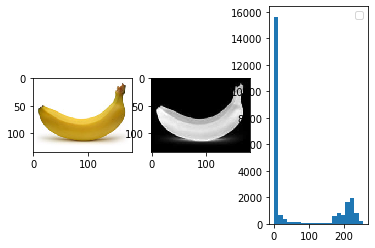

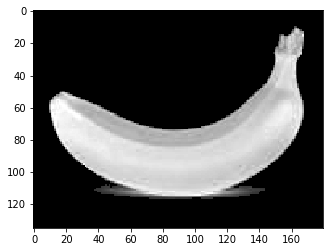

Promedio de color [ 22.22322735 199.45190901 192.70214181]


In [19]:
# ANÁLISIS DE COLOR
def segmentar_promedio_color(img_rgb,img_hsv):
    nr,nc,nch = img_rgb.shape
    Ximg_hsv = np.reshape(img_hsv,(nr*nc,3))
    Ximg_rgb = np.reshape(img_rgb,(nr*nc,3))

    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(img_rgb)
    plt.subplot(1,3,2)
    plt.imshow(img_hsv[:,:,1],cmap='gray')
    plt.subplot(1,3,3)
    plt.hist( Ximg_hsv[:,1],bins=20 )
    plt.legend()
    plt.show()

    Ximg_gray = Ximg_hsv[:,1]
    Ximg_gray[Ximg_hsv[:,1]<50 ] = 0
    Ximg_hsv[ Ximg_hsv[:,1]<50 ,:] = [0,0,0]

    img_gray = np.reshape(Ximg_gray,(nr,nc))

    plt.figure()
    plt.imshow(img_gray,cmap='gray')
    plt.show()

    hsv_average = np.mean(Ximg_hsv[ Ximg_hsv[:,1]>=50 ,:],axis=0)
    print('Promedio de color',hsv_average)
    return hsv_average, img_gray
hsv_average, img_gray = segmentar_promedio_color(img_rgb,img_hsv)

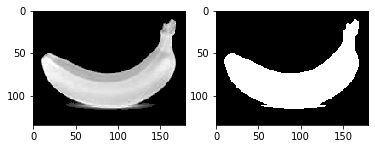

huMOments [[ 1.36746158e-03]
 [ 8.84879873e-07]
 [ 9.54370439e-10]
 [ 1.41471824e-10]
 [-4.71117865e-20]
 [-1.30363613e-13]
 [ 2.19712941e-20]]


In [25]:
# Análisis de forma (momentos hu)

def get_hu_moments(img_gray):
    _,img_bin = cv2.threshold(img_gray,100,255,cv2.THRESH_BINARY)

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(img_gray,cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(img_bin,cmap='gray')
    plt.show()
    
    moments = cv2.moments(img_bin)
    huMoments = cv2.HuMoments(moments)
    print('huMOments',huMoments)
    
    return huMoments,img_bin

huMoments,img_bin= get_hu_moments(img_gray)

In [29]:

""" findDescriptor(img) finds and returns the
Fourier-Descriptor of the image contour"""
contour = []
contour, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE,
    contour)
print('countour',contour)
contour_array = contour[0][:, 0, :]
contour_complex = np.empty(contour_array.shape[:-1], dtype=complex)
contour_complex.real = contour_array[:, 0]
contour_complex.imag = contour_array[:, 1]
fourier_result = np.fft.fft(contour_complex)
print(fourier_result)
    

countour [array([[[162,  11]],

       [[162,  12]],

       [[161,  13]],

       [[160,  14]],

       [[159,  15]],

       [[158,  16]],

       [[157,  16]],

       [[156,  16]],

       [[155,  15]],

       [[154,  15]],

       [[154,  16]],

       [[153,  17]],

       [[153,  18]],

       [[153,  19]],

       [[153,  20]],

       [[153,  21]],

       [[152,  22]],

       [[151,  23]],

       [[150,  24]],

       [[150,  25]],

       [[150,  26]],

       [[150,  27]],

       [[150,  28]],

       [[150,  29]],

       [[150,  30]],

       [[150,  31]],

       [[150,  32]],

       [[150,  33]],

       [[150,  34]],

       [[149,  35]],

       [[149,  36]],

       [[149,  37]],

       [[148,  38]],

       [[148,  39]],

       [[147,  40]],

       [[147,  41]],

       [[146,  42]],

       [[146,  43]],

       [[145,  44]],

       [[144,  45]],

       [[143,  46]],

       [[142,  47]],

       [[141,  48]],

       [[140,  49]],

       [[139,  50]],



In [ ]:
'''
  Las imágenes en HSV
  En las imágenes, los colores con baja saturación se ponen en negro (<=0.3)
  Caracterizar el color (puede ser con el promedio)
  Binarizar imagen
  Extracción de característica de forma

  color:3, momentos hu: 7, fourier:20
'''